## Tarea 3 Luis altamirano 
CNN

## Librerias:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
import os
import re

#############################################

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

################################################

import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.wrappers.scikit_learn import KerasClassifier





## 1 - Analisis de Data

### 1.1 - Importe de data

In [3]:
## Se lee data set
Data1 = pd.read_csv("data.csv")
Data1.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


### 1.2 - Outlier

In [4]:
## se ve informacion del data
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### observación:
Se debe transformar la variable de diagnosis, porque es la variable de respuesta. Por otro lado, el ''id'' no es relevante para el analisis, ya que, al ser el numero de identificación de cada paciente, siempre tiene

In [5]:
## se elimina id
Data = Data1.drop(['id'],axis=1)

## se transforma la variable diagnosis
Data['diagnosis'] = label_encoder.fit_transform(Data['diagnosis'])

## se verifica el data
Data.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


#### Observación:
cuando el diagnostico es benigno, se interpreta como un 0 dentro del data. Por otro lado, cuando es un 1, significa que es un cancer maligno.

### 1.2 - Análisis de columnas correlacionadas

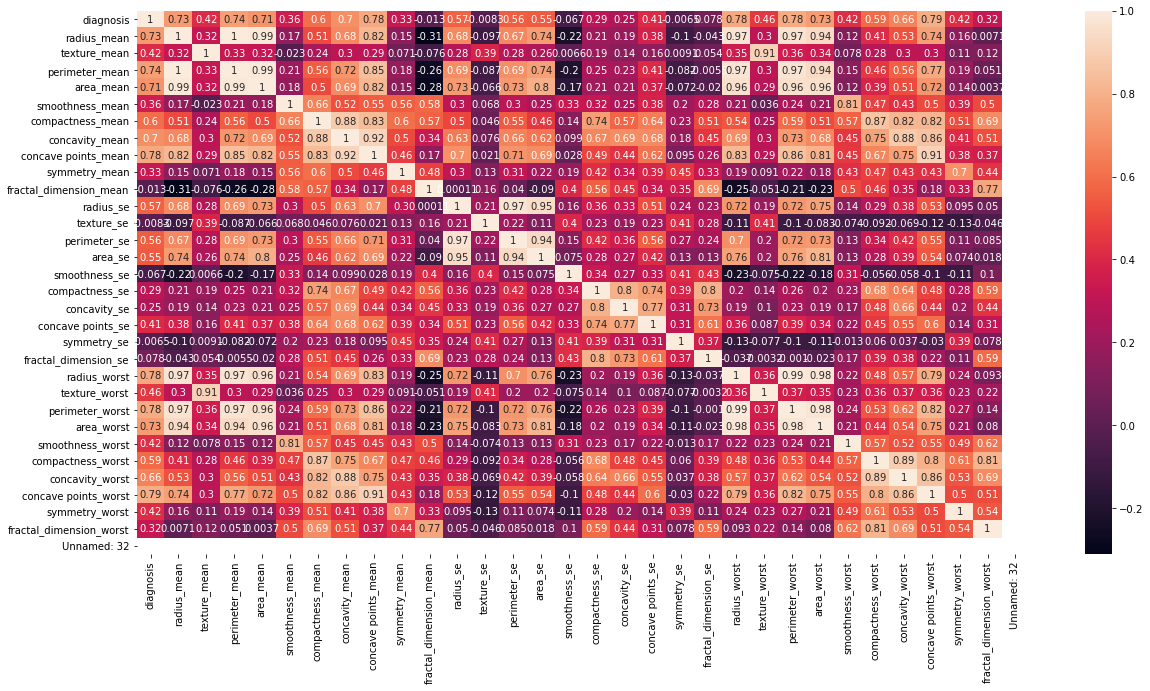

In [6]:
## Mapa de calor de la data
plt.figure(figsize=(20,10))

Corr = Data.corr()
sb.heatmap(Corr, annot=True)
plt.show()

## 2 - Separación Dataset

In [7]:
x = Data[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','smoothness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']].values 
y = Data['diagnosis'].values 

X_train, X_test, Y_train1, Y_test1 = train_test_split(x,y, train_size = 0.8) 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

### 2.1 - Datos de entrenamiento

In [8]:
Y_train=to_categorical(Y_train1) #Transformado para la red neuronal

### 2.2 - Datos de test

In [9]:
Y_test = to_categorical(Y_test1)#Transformado para la red neuronal

#### Observación: 
Se pre procesan losdatos para que tengan valores de 0 a 1 y se hace que la salida en vez de tener un valor unico, sea una matriz 1x2, esto para que pueda ser procesada por la red neuronal.

## 3 - Diseño red neuronal

In [10]:
X_val = X_train[:10]
X_train = X_train[10:]
Y_val = Y_train[:10]
Y_train = Y_train[10:]

In [11]:

#declaramos variables con los parámetros de configuración de la red
epochs = 200 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento170
batch_size = 190 ## cantidad de datos que se toman a la vez en memoria

In [12]:
model = Sequential()
model.add(Dense(600, input_dim=30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4000, input_dim=600, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

#### Observación:
Primero se aplica una red densa de 600 neuronas para una entrada de 30 datos, se aplica dropout para evitar el desvanecimiento de parametros y luego se aplica otra red densa de 4000 neuronas para luego aplicar otro Dropout. Finalmente se pone una red de solo 2 neuronas que representan las 2 posibles salidas, si el cancer es benigno o maligno.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 600)               18600     
_________________________________________________________________
dropout (Dropout)            (None, 600)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4000)              2404000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 4000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8002      
Total params: 2,430,602
Trainable params: 2,430,602
Non-trainable params: 0
_________________________________________________________________


#### Observación:
La red tiene un total de 2.430.602 parametros.

In [14]:
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
Hist = model.fit(X_train, Y_train, 
                      epochs, batch_size,
                     validation_data=(X_val, Y_val))

Epoch 1/190
3/3 [==============================] - 0s 84ms/step - loss: 0.6585 - accuracy: 0.5483 - val_loss: 0.5111 - val_accuracy: 0.7000
Epoch 2/190
3/3 [==============================] - 0s 34ms/step - loss: 0.4691 - accuracy: 0.8629 - val_loss: 0.4077 - val_accuracy: 0.9000
Epoch 3/190
3/3 [==============================] - 0s 33ms/step - loss: 0.3396 - accuracy: 0.8629 - val_loss: 0.2844 - val_accuracy: 0.8000
Epoch 4/190
3/3 [==============================] - 0s 35ms/step - loss: 0.2789 - accuracy: 0.8764 - val_loss: 0.2448 - val_accuracy: 0.9000
Epoch 5/190
3/3 [==============================] - 0s 33ms/step - loss: 0.2331 - accuracy: 0.8989 - val_loss: 0.1599 - val_accuracy: 0.9000
Epoch 6/190
3/3 [==============================] - 0s 34ms/step - loss: 0.2053 - accuracy: 0.9213 - val_loss: 0.1100 - val_accuracy: 1.0000
Epoch 7/190
3/3 [==============================] - 0s 34ms/step - loss: 0.1891 - accuracy: 0.9303 - val_loss: 0.0966 - val_accuracy: 0.9000
Epoch 8/190
3/3 [===

## 4 - Desempeño

### 4.1 - Desempeño General

In [17]:
test_eval= model.evaluate(X_test, Y_test, verbose=2)
train_eval= model.evaluate(X_train, Y_train, verbose=2)
#se guarda modelo
model.save("modelo_cancer.h5py")

4/4 - 0s - loss: 0.1692 - accuracy: 0.9561
14/14 - 0s - loss: 0.0091 - accuracy: 0.9978
INFO:tensorflow:Assets written to: modelo_cancer.h5py\assets


In [18]:
#se carga modelo
model=keras.models.load_model('modelo_cancer.h5py')

print('Perdida Test:',test_eval[0]*100,'%')
print('Presición datos Test:',test_eval[1]*100,'%')
print('Perdida entrenamiento:',train_eval[0]*100,'%')
print('Presición datos Entrenamiento:',train_eval[1]*100,'%')

Perdida Test: 16.92020297050476 %
Presición datos Test: 95.61403393745422 %
Perdida entrenamiento: 0.9073938243091106 %
Presición datos Entrenamiento: 99.77527856826782 %


#### Observación: 
Se presenta una presición del 95.6% en los datos de Test.

### 4.2 - Curva de entrenamiento vs perdida en entrenamiento

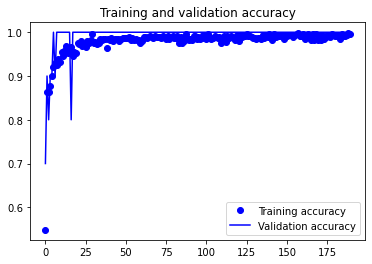

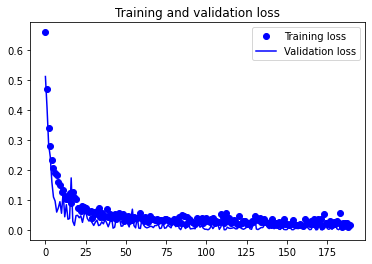

In [19]:
accuracy = Hist.history['accuracy']
val_accuracy =  Hist.history['val_accuracy']
loss =  Hist.history['loss']
val_loss =  Hist.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



### Observación: 
La presicion tiene a oscilar el 95.6% cuando llega a la epoca 40 aproximadamente.

### 4.3 - Matriz de confusión 

In [20]:
pred0 = model.predict(X_test)

pred=[]
test_Y1=[]

num=pred0.shape


for j in range(0,num[0]):
    
    # se crea vector predictor(0=cancer benigno, 1= cancer maligno)
    if pred0[j][0]>pred0[j][1]:
        a=0
        pred.append(a)
    else:
        a=1
        pred.append(a)
    
    # se crea vector valores test de salida(0=cancer benigno, 1= cancer maligno)
    if Y_test[j][0]>Y_test[j][1]:
        b=0
        test_Y1.append(b)
    else:
        b=1
        test_Y1.append(b)

## se imprime matriz
print(confusion_matrix(test_Y1,pred))
print(classification_report(test_Y1,pred))

[[68  4]
 [ 1 41]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Observación: 
Segun la matriz de confusión el algoritmo tiene mas probabilidades de acertar cuando el cancer es benigno, acertando el 99% de las veces. Y tiene una presición del 91% cuando el cancer es maligno.